In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# File handling
import pickle

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Machine learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
users = pd.read_csv('./book_dataset/Users.csv')
books = pd.read_csv('./book_dataset/Books.csv')
ratings = pd.read_csv('./book_dataset/Ratings.csv')

C:\Users\salla\AppData\Local\Temp\ipykernel_20460\3385902873.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('./book_dataset/Books.csv')


# I. Buisiness Understanding

For book sellers, it is important to propose books that a client might like in order to keep them faithful and imrpove satisfaction. This is why they build recommandation systems to solve this issue.

To do this, we could either use the content of the books or the ratings the user give to them. In this notebook, we will explore the second method.

# II. Data Understanding

In these tables, we have information about the books, their reviews and the users who rated them. Let's explore these tables.

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
books["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

There are some errors 'DK Publishing Inc' 'Gallimard'

In [6]:
books[books["Year-Of-Publication"].isin(["DK Publishing Inc", "Gallimard"])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


The values of Book-Title and Book-Author are concatenated in Book-Title and so the values to the right are shifted. We will fix this after, this is only the data understanding part.

In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


A lot of values for the age are missing, we might not be abel to use it for the book recommandation.

In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
# !pip install missingno


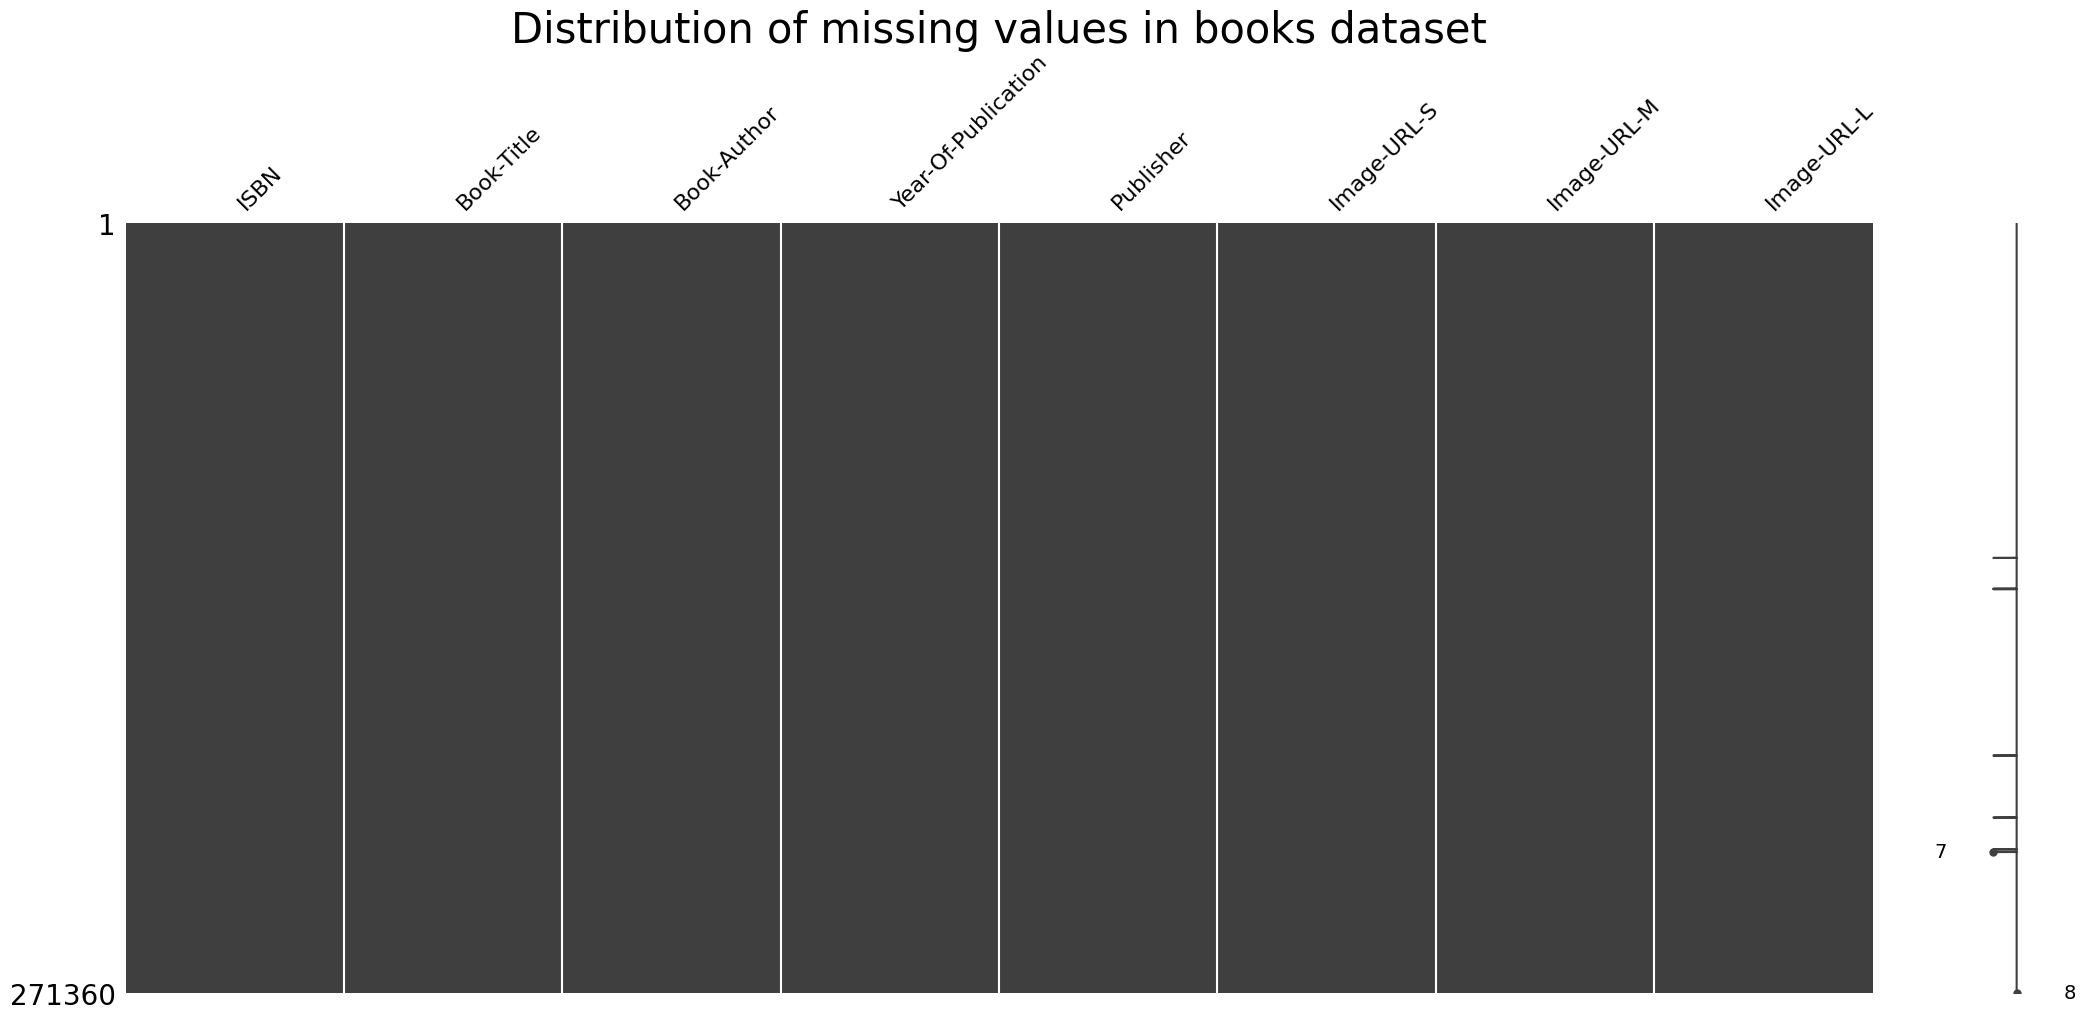

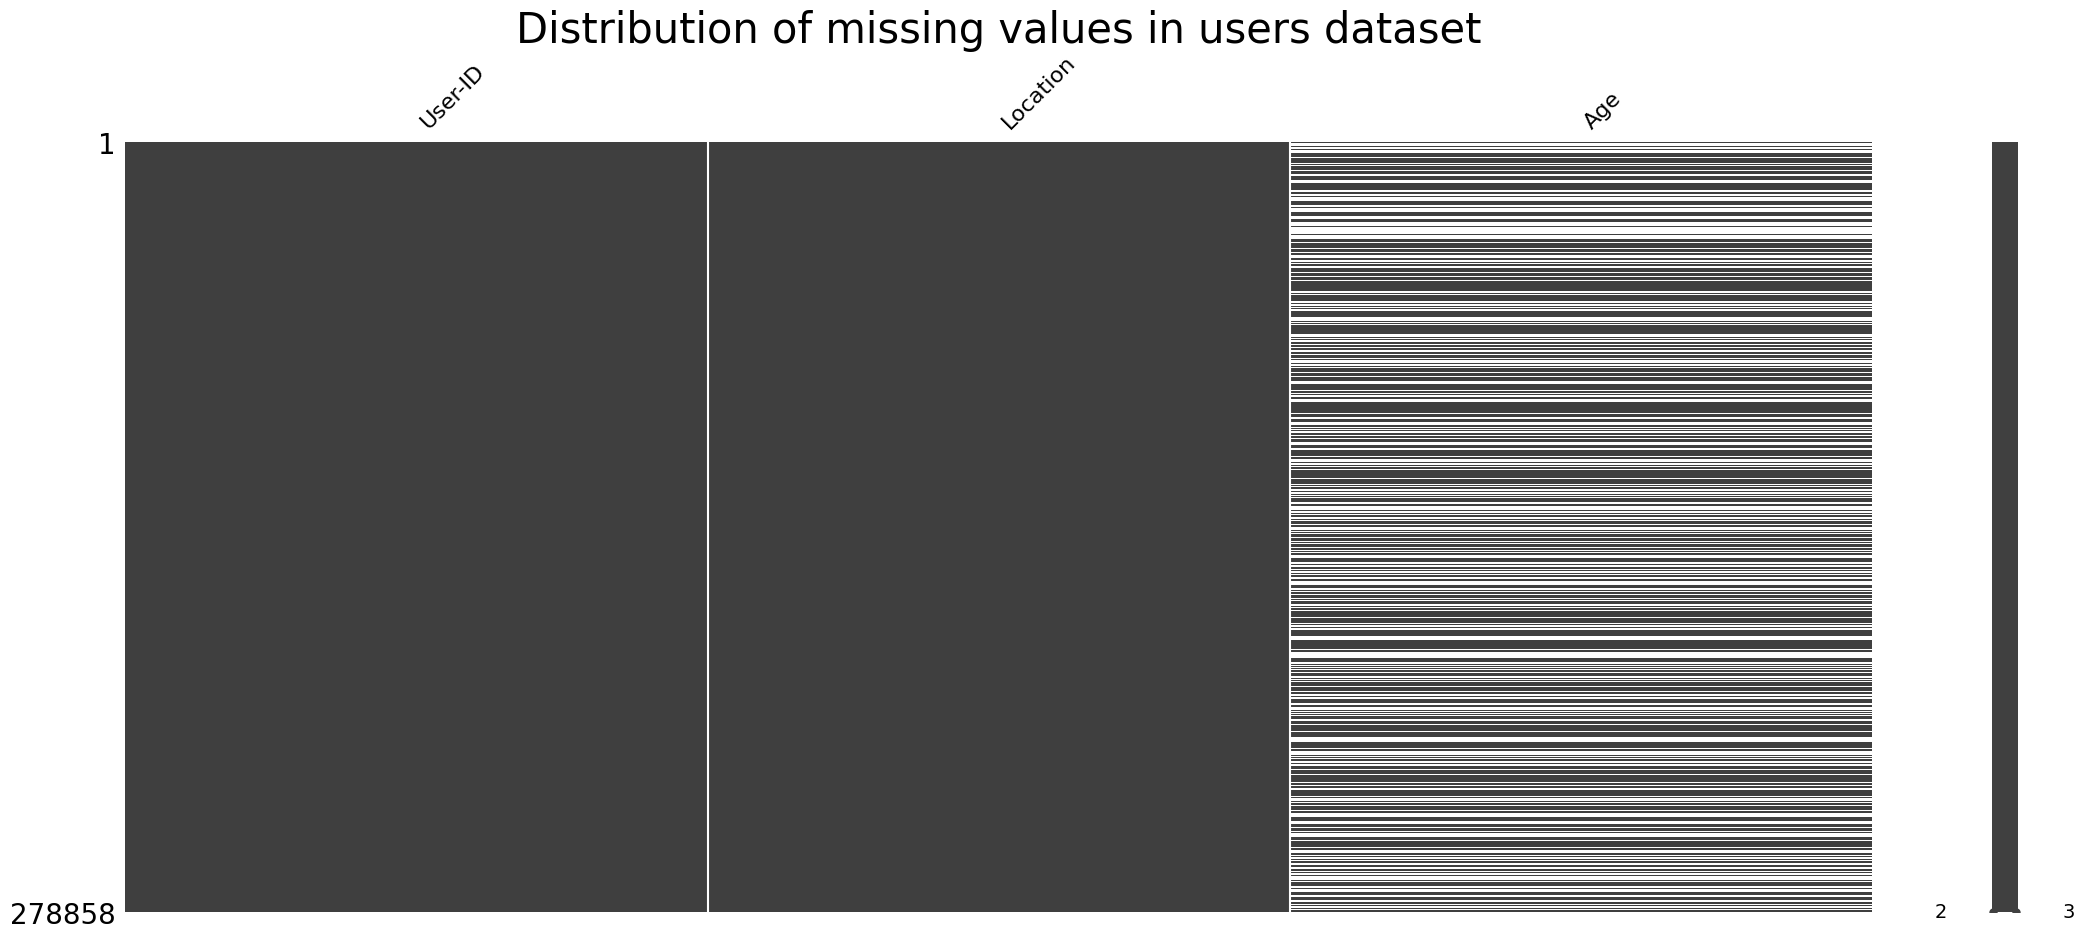

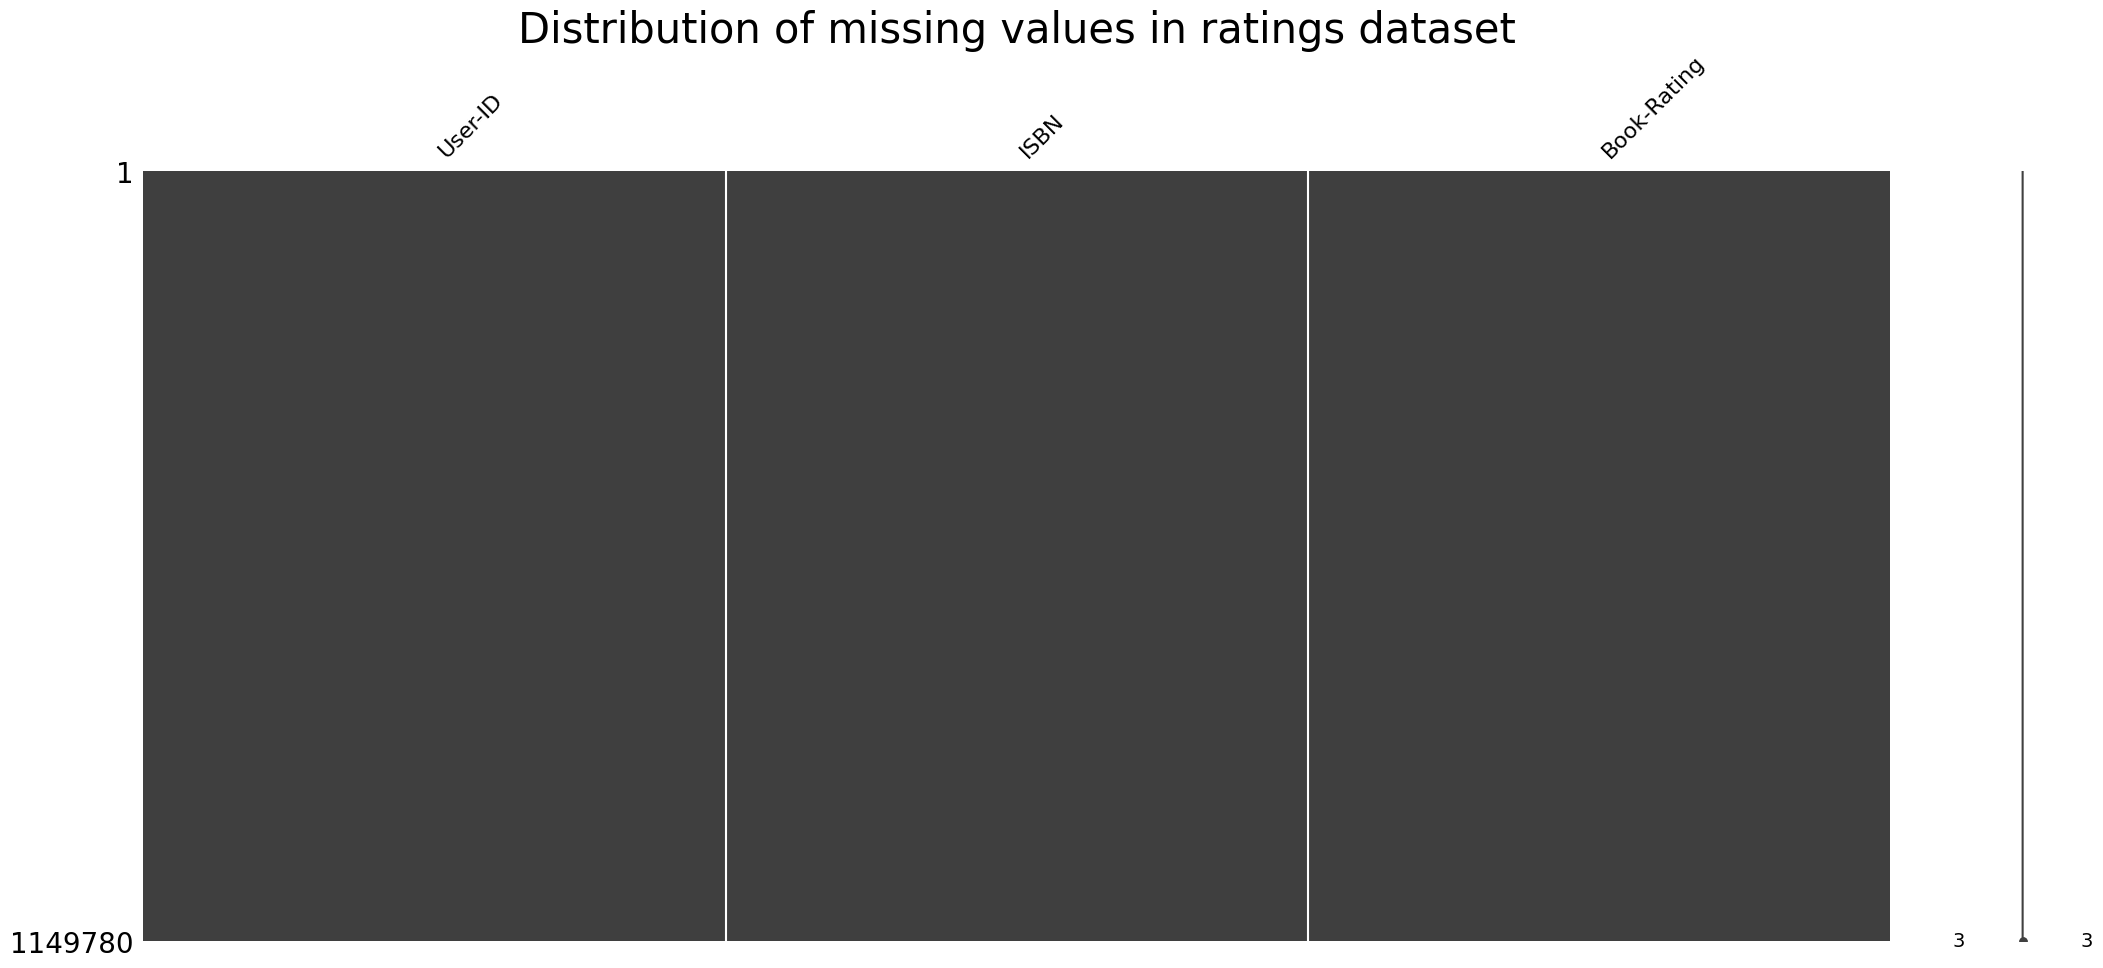

In [12]:
import missingno as msno
msno.matrix(books)
plt.title(f'Distribution of missing values in books dataset', fontsize=30)
msno.matrix(users)
plt.title(f'Distribution of missing values in users dataset', fontsize=30)
msno.matrix(ratings)
plt.title(f'Distribution of missing values in ratings dataset', fontsize=30)
plt.show()

The age column seems to have many missing values, we won't use it.

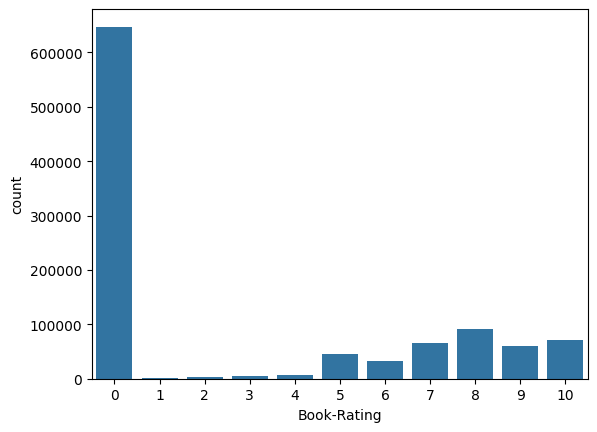

In [105]:
_=sns.barplot(ratings["Book-Rating"].value_counts())

# III. Data Preparation

## Shift values
Let's solve the shifted values issue.

In [13]:
temp = books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

authors = []
books_titles = []

for title in temp['Book-Title']:
    
    author = title.split(';')[-1].split('"')[0]
    book = title.split(';')[0].split('\\')[0]

    authors.append(author)
    books_titles.append(book)

print(authors)
print(books_titles)

['Michael Teitelbaum', 'Jean-Marie Gustave Le ClÃ?Â©zio', 'James Buckley']
['DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)', "Peuple du ciel, suivi de 'Les Bergers", 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)']


In [14]:
cols_to_shift = books.columns[1:]
temp = pd.concat([temp['ISBN'].to_frame(), temp[cols_to_shift].shift(periods = 1, axis = 1)], axis=1)
temp['Book-Title'] = books_titles
temp['Book-Author'] = authors
temp

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [15]:
# Drop incorrect rows
books = books.drop(temp.index)

# Add correct rows
books = pd.concat([books, temp])

In [16]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int32')

In [17]:
books.loc[books["Year-Of-Publication"] == 0, "Year-Of-Publication"] = np.nan

## Rating table
We will calculate a pivot table with the users as columns and books as rows. This will be the base of our recommandation system.

In [18]:
ratings = ratings.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')
ratings.dropna(inplace=True)
ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,0155061224,5,Rites of Passage
2,276727,0446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...


In [19]:
# ratings.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

The dataframe is too big to perform this operation, so we will filter some values.

In [20]:
# Filtering
# trusted_users = ratings['User-ID'].value_counts()[ratings['User-ID'].value_counts() > 50].index
# popular_books = ratings["Book-Title"].value_counts()[ratings['Book-Title'].value_counts() > 100].index

trusted_users = ratings['User-ID'].value_counts()[ratings['User-ID'].value_counts() >= 10].index
popular_books = ratings["Book-Title"].value_counts()[ratings['Book-Title'].value_counts() >= 20].index

print(f'Number of trusted users: {len(trusted_users)}')
print(f'Number of popular books: {len(popular_books)}')

Number of trusted users: 11746
Number of popular books: 7608


In [21]:
filtered_ratings = ratings[ratings['Book-Title'].isin(popular_books) & ratings['User-ID'].isin(trusted_users)]

In [22]:
rating_table = filtered_ratings.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0).T
rating_table.head()

User-ID,8,99,242,243,254,383,388,408,424,446,...,278522,278535,278554,278563,278582,278633,278637,278771,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001 Ways to Be Romantic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
print(rating_table.shape)

(7608, 11493)


We can see that we have many values (87 million), which slows down the calculations. 

To solve this, we will use Principal Component Analysis (PCA) in order to reduce the dimension of the dataset. This method linearly transforms the data onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.

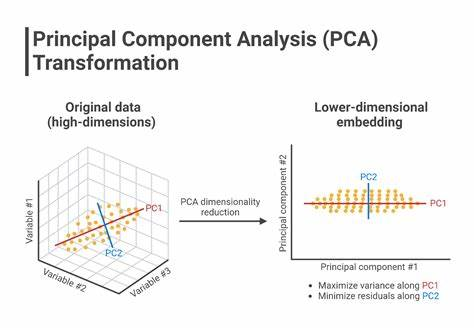

In [ ]:
# Let's use 100 components
rating_table_pca = PCA(n_components=100).fit_transform(rating_table)
rating_table_pca = pd.DataFrame(rating_table_pca, index=rating_table.index)
rating_table_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,-1.250148,-2.710902,-0.882310,1.001535,-4.113707,-3.959570,-3.005849,1.356770,1.553421,-0.526585,...,0.109387,1.648177,-1.275498,1.355974,0.943428,-1.290443,-0.274693,-0.534567,-0.352101,-1.070825
01-01-00: The Novel of the Millennium,1.821895,3.558143,-1.165271,0.797291,-0.010259,-0.189007,-0.118043,0.473337,-0.686889,0.019896,...,-0.281284,1.185564,0.228580,-0.025301,0.216907,-0.175684,0.683847,0.418517,0.244926,-0.046345
10 Lb. Penalty,-2.125910,-0.844219,-0.319689,0.176353,0.263100,-1.282246,1.898299,-1.717805,0.403127,-0.816928,...,0.868568,-0.624531,-0.558630,-0.935547,-0.664558,-0.162156,-0.593955,0.994854,-1.888004,0.485804
1001 Ways to Be Romantic,-2.613648,-0.454683,-1.027929,0.023471,0.163364,-0.272049,-0.188545,0.209291,-0.411542,-0.247383,...,0.083974,-0.394190,0.368311,-0.664714,-0.926887,-0.144122,0.589611,-0.070880,0.102083,0.295106
101 Dalmatians,-1.906985,-1.238977,-0.908102,-0.077231,-1.434856,-0.764401,0.154500,0.987666,1.558677,-0.065882,...,-1.123161,-0.641292,1.289063,2.024342,-0.529635,0.481132,0.301716,2.532936,-0.081136,-0.332048


In [26]:
train, test = train_test_split(rating_table_pca, test_size=0.2, random_state=42)
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (6086, 100)
Test shape: (1522, 100)


# IV. Modelling

To recommand books, we will :
- Start from a book title
- Find the cluster it belongs to
- Calculate the similarity between books
- Keep the 10 most similar books that are in the same cluster

For clustering, we will use the KMeans algorithm because we face a non-supervised clustering problem. As a reminder, here is an explanation of how it works.

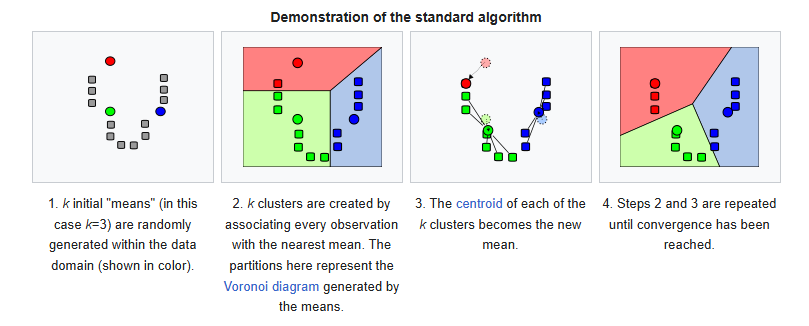

To choose the number of clusters, we will try to use the elbow method along with te highest silhouette score technique.

In [27]:
def plot_inertia_silhouette(start, end, step):
    acc = []
    inertia = []
    silhouette = []

    cluster_range = range(start, end, step)

    for i in cluster_range:
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(train)
        acc.append(kmeans.score(train))
        silhouette.append(silhouette_score(train, kmeans.labels_))
        inertia.append(kmeans.inertia_)
        
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, inertia)
    plt.xticks(cluster_range)
    plt.title('Inertia')

    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, silhouette)
    plt.xticks(cluster_range)
    plt.title('Silhouette Score')


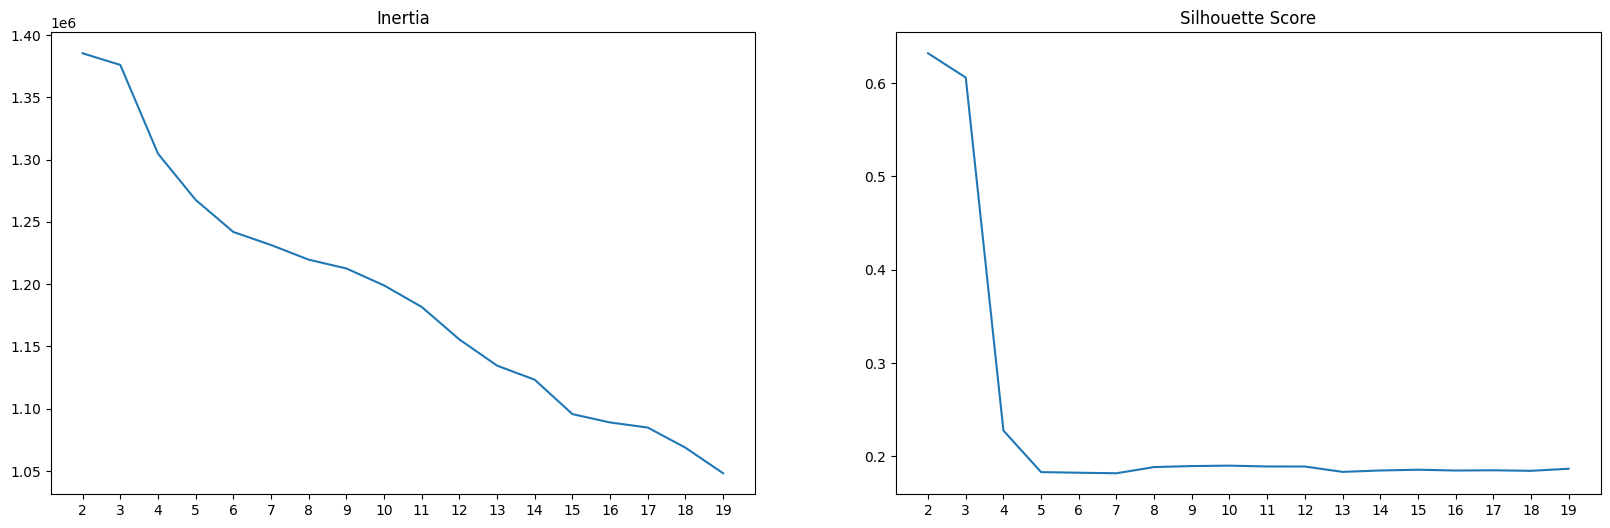

In [28]:
plot_inertia_silhouette(2, 20, 1)

When plotting the inertia and the silhouette score for 2 to 20 clusters, we cannot apply the elbow method. Howevery we can see that the silhouette score is dropping after a number of 4 clusters.

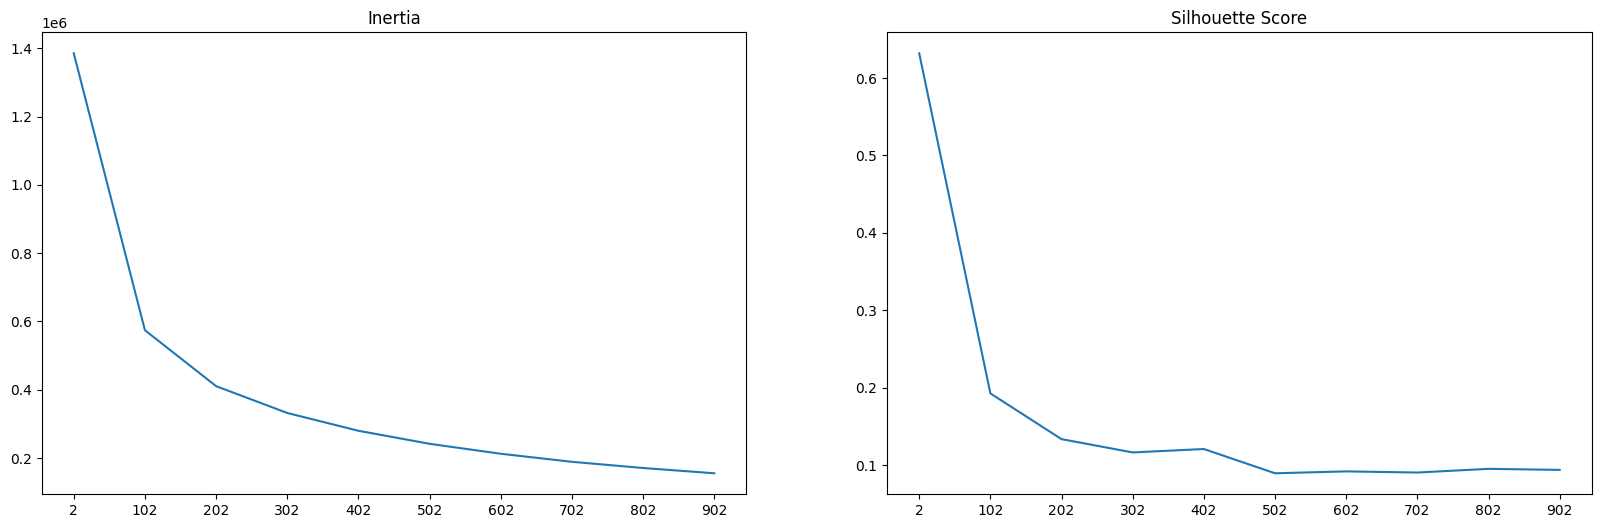

In [29]:
plot_inertia_silhouette(2, 1000, 100)

With 1000 clusters however, based on the elbow method on the inertia plot, we can say that a good number of clusters is 100. However with the second plot, we observe that the silhouete score is poor (around 0.2).

Let's use n_clusters = 2, which gives the best silhouette score and which is a more common value than 100.

In [30]:
n_clusters = 2

In [31]:
model = KMeans(n_clusters=n_clusters, random_state=42).fit(train)
preds = model.predict(train)

score = silhouette_score(train, preds)
print('Silhouette score : ', score)

Silhouette score :  0.6318946169901215


Let's plot the two first components to see how the books are clustered.

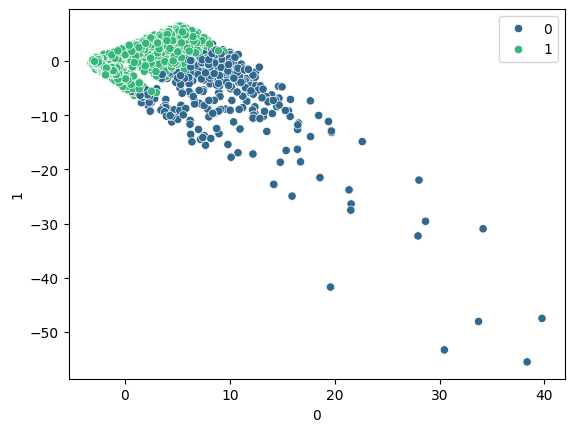

In [33]:
_=sns.scatterplot(x=train[0], y=train[1], hue=preds, palette='viridis')

We cannot see distincts clusters, which explains why the silhouette score is not close to 1. However we have to keep in that this is a plot of 2 of the 100 components.

# V. Evaluation

## Silhouette Score

To evaluate a clustering task, we use the silhouette score. It is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

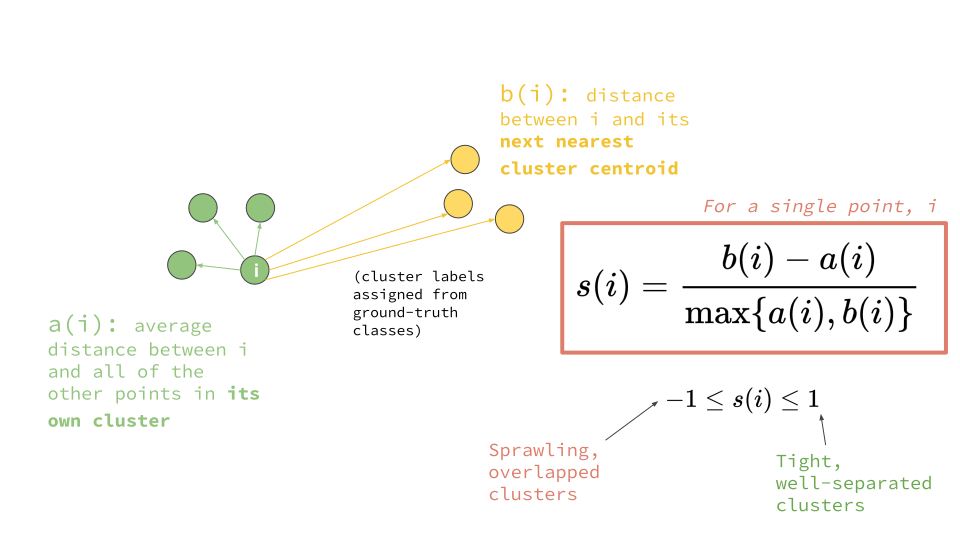

In [34]:
model = KMeans(n_clusters, random_state=42).fit(train)
test_pred = model.predict(test)

silhouette_score(test, test_pred)
print(f"Silhouette score on the test set: {silhouette_score(test, test_pred)}")

Silhouette score on the test set: 0.6387096941786807


The silhouette score is not very high, but it still indicates each data point fits into its assigned cluster.

## Interpretation of the clusters

Let's predict the cluster for each book.

In [35]:
books_cluster = model.predict(rating_table_pca)
cluster_prediction = pd.DataFrame(books_cluster, index=rating_table_pca.index, columns=['Cluster'])
cluster_prediction.head()

,Cluster
Book-Title,
'Salem's Lot,1
01-01-00: The Novel of the Millennium,1
10 Lb. Penalty,1
1001 Ways to Be Romantic,1
101 Dalmatians,1


Let's see the distribution of the clusters

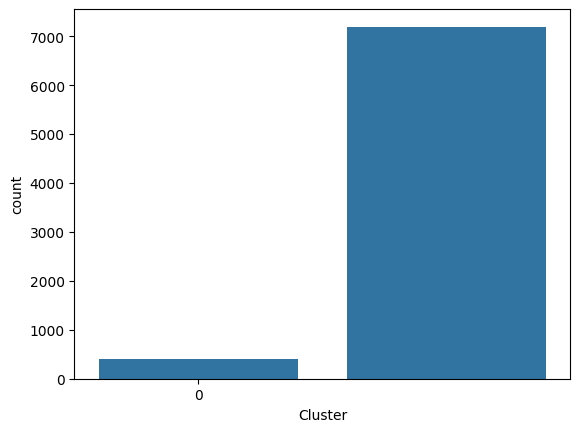

In [36]:
sns.barplot(cluster_prediction['Cluster'].value_counts())
plt.xticks(range(0, n_clusters, 10))
plt.show()

We can see that the books are not well distributed along the two clusters.

Let's try to understand what the different clusters represent.

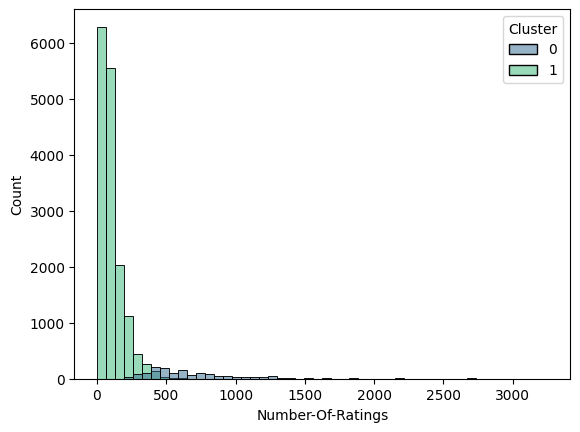

In [37]:
books_ = pd.merge(books[books['Book-Title'].isin(popular_books)], cluster_prediction, left_on='Book-Title', right_index=True, how='left')
books_ = pd.merge(books_, rating_table.sum(axis=1).to_frame().rename(columns={0: 'Number-Of-Ratings'}), left_on='Book-Title', right_index=True, how='left')

_=sns.histplot(data=books_, x='Number-Of-Ratings', hue='Cluster', multiple="layer", bins=50, palette='viridis')

We can see that the model seems to have clustered books with a similar number of ratings together. Unpopular books are in one cluster while popular books are in the other.

In [38]:
books_["Average-Rating"] = pd.merge(books_, (rating_table.sum(axis=1)/rating_table.astype(bool).sum(axis=1)).to_frame().rename(columns={0: 'Average-Rating'}), left_on='Book-Title', right_index=True, how='left')['Average-Rating']

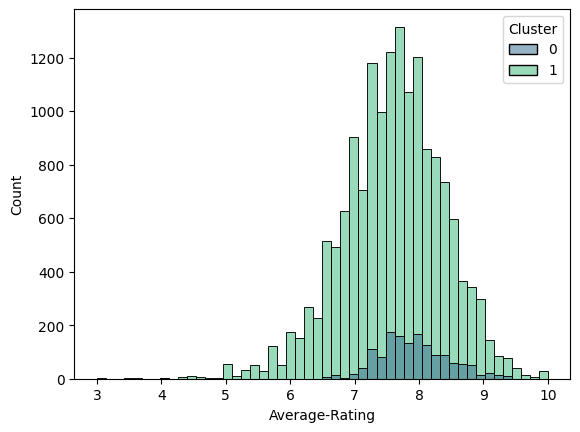

In [39]:
_=sns.histplot(data=books_, x='Average-Rating', hue='Cluster', multiple="layer", bins=50, palette='viridis')

The clustering doesn't seem to be based on the average ratings of the books.

## Recommandation system

To finish the book recommandation system, we need to calculate a similarity score between books. To do this, we will use the cosine similarity, which ranges between -1 and 1 where a high value is a high similarity.

We will apply this to the book vectors.

<div style="width:1000px; text-align:center;">

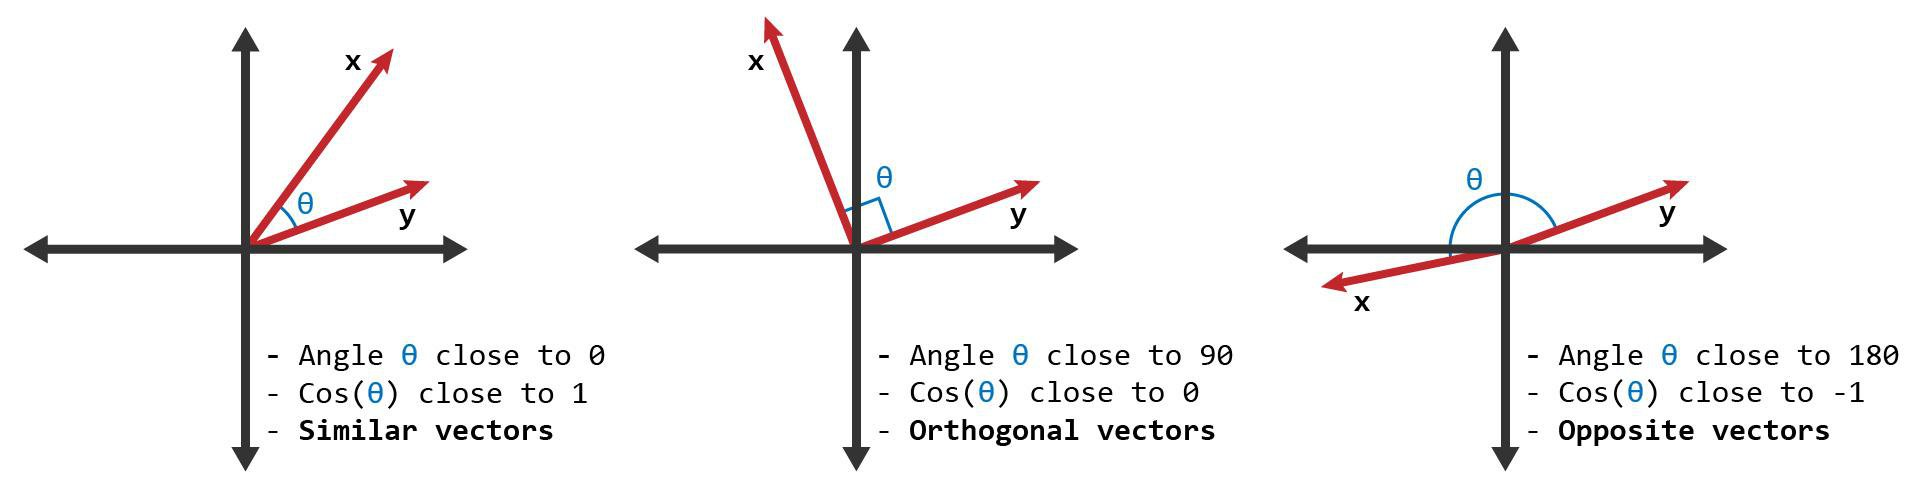

</div>


In [111]:
# Book vector for 1984
rating_table_pca[rating_table_pca.index == '1984'].T

Book-Title,1984
0,8.479188
1,-10.406215
2,-6.442321
3,-2.499530
4,-0.857544
...,...
95,-5.973075
96,0.005048
97,-1.864250
98,-5.176378


Here is how it is calculated.

<div style="">

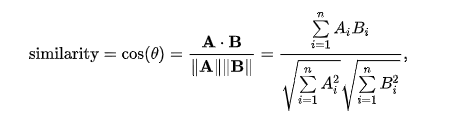

</div>

Now that we have all of this, we can build our recommandation system.

In [41]:
def get_recommandation(title, rating_table, predictions, n_recommandation=10):
    if title not in rating_table.index:
        return "Book not found in the dataset"

    # Get cluster
    book_cluster = predictions.loc[title, 'Cluster']
    cluster_books = predictions[predictions['Cluster'] == book_cluster].index
    books = cluster_books
    
    # Get similarity
    book_recommandations = cosine_similarity(rating_table[rating_table.index==title], rating_table[rating_table.index.isin(books)])
    book_recommandations = pd.DataFrame({'Book-Title': books, 'Similarity': book_recommandations[0]}).set_index('Book-Title').sort_values(by='Similarity', ascending=False)
    book_recommandations.drop(title, inplace=True)

    return book_recommandations.head(n_recommandation)

In [42]:
print(get_recommandation("1984", rating_table_pca, cluster_prediction))
print(get_recommandation("The Handmaid's Tale", rating_table_pca, cluster_prediction))
print(get_recommandation("Harry Potter and the Prisoner of Azkaban (Book 3)", rating_table_pca, cluster_prediction))

                                                    Similarity
Book-Title                                                    
Animal Farm                                           0.590571
Brave New World                                       0.549685
Slaughterhouse Five or the Children's Crusade: ...    0.446198
Lord of the Flies                                     0.397163
The Handmaid's Tale                                   0.377436
The Alchemist: A Fable About Following Your Dream     0.364510
Atlas Shrugged                                        0.310592
Word Freak: Heartbreak, Triumph, Genius, and Ob...    0.303613
The Great Gatsby                                      0.303011
The Virgin Suicides                                   0.301219
                                                    Similarity
Book-Title                                                    
Bastard Out of Carolina                               0.405129
The Handmaid's Tale : A Novel                         0

Now we can save the data we need to deploy this system.

In [ ]:
with open('rating_table.pkl', 'wb') as file:
    pickle.dump(rating_table_pca, file)

with open('book_cluster.pkl', 'wb') as file:
    pickle.dump(cluster_prediction, file)

In [65]:
# Open data
with open('rating_table.pkl', 'rb') as file:
    rating_table_ = pickle.load(file)

rating_table_.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,-1.250148,-2.710902,-0.882310,1.001535,-4.113707,-3.959570,-3.005849,1.356770,1.553421,-0.526585,...,0.109387,1.648177,-1.275498,1.355974,0.943428,-1.290443,-0.274693,-0.534567,-0.352101,-1.070825
01-01-00: The Novel of the Millennium,1.821895,3.558143,-1.165271,0.797291,-0.010259,-0.189007,-0.118043,0.473337,-0.686889,0.019896,...,-0.281284,1.185564,0.228580,-0.025301,0.216907,-0.175684,0.683847,0.418517,0.244926,-0.046345
10 Lb. Penalty,-2.125910,-0.844219,-0.319689,0.176353,0.263100,-1.282246,1.898299,-1.717805,0.403127,-0.816928,...,0.868568,-0.624531,-0.558630,-0.935547,-0.664558,-0.162156,-0.593955,0.994854,-1.888004,0.485804
1001 Ways to Be Romantic,-2.613648,-0.454683,-1.027929,0.023471,0.163364,-0.272049,-0.188545,0.209291,-0.411542,-0.247383,...,0.083974,-0.394190,0.368311,-0.664714,-0.926887,-0.144122,0.589611,-0.070880,0.102083,0.295106
101 Dalmatians,-1.906985,-1.238977,-0.908102,-0.077231,-1.434856,-0.764401,0.154500,0.987666,1.558677,-0.065882,...,-1.123161,-0.641292,1.289063,2.024342,-0.529635,0.481132,0.301716,2.532936,-0.081136,-0.332048
